In [29]:
import os
from dotenv import load_dotenv
from IPython.display import Markdown, display, update_display, Image
from openai import OpenAI
import google.generativeai as genai
import anthropic
import ollama
import gradio as gr

In [2]:
# Load environment variables in a file called .env

load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY", "your-key-if-not-using-env")
os.environ["ANTHROPIC_API_KEY"] = os.getenv(
    "ANTHROPIC_API_KEY", "your-key-if-not-using-env"
)
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY", "your-key-if-not-using-env")

In [3]:
system_message = "You are a helpful assistant that analyzes the content of an article and provides a summary in markdown."
prompt = "Please provide a short summary of the article in markdown format."

In [4]:
# Connect to OpenAI, Anthropic and Google

openai = OpenAI()

claude = anthropic.Anthropic()

genai.configure()

In [13]:
# Let's wrap a call to llama3.2 in a function
def summarize_llama(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt},
    ]
    response = ollama.chat(model="llama3.2", messages=messages)
    return response['message']['content']

In [6]:
# Let's wrap a call to GPT-4o-mini in a simple function

def summarize_gpt(prompt=prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt},
    ]
    response = openai.chat.completions.create(
        model="gpt-4o-mini", messages=messages, stream=False
    )
    return response.choices[0].message.content

In [8]:
def summarize_claude(article_text):
    """
    Sends an article to the Anthropic API to generate a summary.
    
    Parameters:
    article_text (str): The full text of the article to be summarized.
    
    Returns:
    str: The summary of the article generated by the Anthropic API.
    """
    
    system_message = """
    You are an AI assistant tasked with summarizing articles. Your goal is to provide a concise, accurate, and informative summary of the key points in the given article text. Focus on capturing the main ideas, key findings, and important conclusions. Avoid including unnecessary details or tangents. The summary should be approximately 1-2 paragraphs in length.
    """
    
    try:
        response = claude.messages.create(
            model="claude-3-haiku-20240307",
            max_tokens=1000,
            system = system_message,
            messages = [
                {"role": "user", "content": article_text}
            ]
        )
        return response.content[0].text
    except Exception as e:
        raise Exception(f"Error summarizing article: {e}")

In [9]:
def gemini(prompt=prompt):
    gemini = genai.GenerativeModel(
    model_name='gemini-1.5-flash',
    system_instruction=system_message
    )
    response = gemini.generate_content(prompt)
    return response.candidates[0].content.parts[0].text

In [10]:
import pandas as pd

# Read a sample article from a CSV file
df = pd.read_csv("articles.csv")
df.head()

,article_id,full_text,ABSTRACT
0,PMC11315657,Exploring the association between melatonin an...,Due to the addictive qualities of tobacco prod...
1,PMC11204383,Antibodies Against ZSCAN1 in Pediatric and Adu...,"Objectives, To report the association of zinc ..."
2,PMC11301388,Gingival mesenchymal stem cells: Biological pr...,Our understanding of mesenchymal stem cells (M...
3,PMC11240861,Research progress of DNA methylation in colore...,DNA methylation is one of the earliest and mos...
4,PMC11289611,"Investigating the Relationship of Serum CD163,...","Objective, This study aimed to compare serum l..."


In [11]:
# Select the first article
article = df["full_text"][0]
abstract = df["ABSTRACT"][0]

In [16]:
# Use Ollama to summarize the article
ollama_summary = summarize_llama(article)
print("Ollama Summary:")
display(Markdown(ollama_summary))

Ollama Summary:


The text does not present a single, coherent scientific article or study on melatonin's association with nicotine dependence. 

However, it appears to be an expansive literature review that discusses melatonin levels, their effects, potential therapeutic targets, mechanisms of action and limitations in modulating circadian rhythm-driven cycle which increases peak levels at nightfalling during dawn hours. Melatonin’s interaction with nicotine addiction must account for the timing patterns as their study design, analysis methods., The text also suggests several challenges that researchers face in studying the melatonin-nicotine dependence relationship.

Here is a concise, structured summary based on what appears to be presented in the text:

1.  **Genetic variations**: Influence individual response to melatonin treatment for nicotine dependence.
2.  Variability  and precision of measuring nicotine exposure or withdrawal symptoms measurement or craving assessment.
3. Lack adequate data quality & reliability from indirect measures (e.g., saliva, urine).
4. Difficulty with accurate measurement of melatonin levels due to its episodic release, short half-life in blood.
5. Limitations when using self-reported smoking status.
6. Melatonin’s effect may be confounded by other factors such as age, diet, or lifestyle patterns.

In [17]:
openai_response = summarize_gpt(article)
print("OpenAI Summary:")
display(Markdown(openai_response))

OpenAI Summary:


# Summary of "Exploring the association between melatonin and nicotine dependence"

## Introduction
Nicotine dependence is a significant public health issue characterized by compulsive cravings and a physiological or psychological reliance on nicotine. Despite extensive research into nicotine addiction's mechanisms, effective prevention and interruption strategies remain scarce. Emerging evidence suggests a potential link between nicotine dependence and melatonin, a neuroendocrine hormone regulated by the circadian rhythm.

## Melatonin and its Physiological Roles
Melatonin is produced by the pineal gland, its secretion controlled by light-dark cycles via the suprachiasmatic nucleus (SCN) of the hypothalamus. Beyond its known role in sleep regulation, melatonin has antioxidant, immunomodulatory, and neuroprotective properties.

## Association between Melatonin and Nicotine Dependence
Research indicates that melatonin may influence nicotine dependence through its receptors distributed throughout the brain, particularly in areas related to reward and addictive behavior. Preclinical studies suggest that melatonin can modulate the reinforcing effects of nicotine and help mitigate oxidative stress caused by chronic exposure.

## Overview of Nicotine Dependence
Nicotine addiction stems from its pharmacological effects in the brain's reward pathways, leading to feelings of pleasure and subsequent neuroadaptations. Behavioral and psychological aspects further complicate dependence, with environmental cues and emotional coping mechanisms reinforcing smoking habits. Health consequences of nicotine dependence include cardiovascular diseases, respiratory disorders, and various cancers.

## Melatonin Receptors in the Brain
Melatonin operates via two main receptors, MT1 and MT2, influencing circadian regulation, sleep-wake cycles, mood, and neuroprotection. These receptors play a critical role in modulating neurotransmitter systems involved in addiction.

## Influence on Neurotransmitter Systems
Melatonin affects several neurotransmitter systems:
- **Dopaminergic system**: May attenuate dopamine release and reward processing.
- **Glutamatergic system**: Influences synaptic plasticity and craving behaviors.
- **GABAergic system**: Modulates inhibitory signaling, reducing drug-induced hyperactivity.
- **Serotonergic system**: Interacts with mood and reward processing.
- **Endogenous opioid system**: May alleviate withdrawal symptoms and reduce self-administration.

## Circadian Rhythms and Nicotine Cravings
Circadian rhythms play a significant role in modulating nicotine cravings, with disruptions potentially worsening vulnerability to addiction. Strategies to restore circadian rhythms may aid in smoking cessation efforts.

## Mitigating Withdrawal Symptoms with Melatonin
Melatonin has been shown to alleviate anxiety-related and craving responses during nicotine withdrawal, making it a promising adjunct therapy for cessation. Clinical studies have reported reduced withdrawal symptoms in smokers using melatonin supplements.

## Future Research Considerations
There are notable gaps in understanding the association between melatonin and nicotine dependence, including the need for:
- Clarification of molecular mechanisms.
- Studies on individual differences in response to melatonin.
- Strategies for incorporating melatonin into cessation protocols and identifying biomarkers for treatment response.

## Conclusion
The interplay between melatonin and nicotine dependence reveals complex mechanisms that could inform innovative therapeutic strategies for managing addiction and associated sleep issues. Further research is critical to elucidate these relationships and develop effective interventions.

In [18]:
# Use the Anthropic API to summarize the article
anthropic_response = summarize_claude(article)
print("Anthropic Summary:")
display(Markdown(anthropic_response))

Anthropic Summary:


Here is a summary of the key points from the article:

The article explores the potential association between melatonin, a hormone involved in regulating circadian rhythms, and nicotine dependence. Nicotine dependence is a significant public health challenge, contributing to various adverse health effects including cardiovascular disease, respiratory disorders, and cancer. 

Melatonin has diverse physiological roles beyond its primary function in circadian regulation, including antioxidant, immunomodulatory, and neuroprotective properties. Melatonin receptors are widely distributed in the brain, including regions implicated in the reward pathway and addiction-related behaviors. Preclinical studies suggest melatonin may modulate the reinforcing effects of nicotine and attenuate nicotine-seeking behavior.

The article discusses the potential interplay between melatonin-regulated circadian rhythms and nicotine cravings. Disruptions in circadian rhythms can exacerbate nicotine cravings and increase vulnerability to nicotine addiction. Chronotherapeutic interventions targeting melatonin signaling may help mitigate nicotine withdrawal symptoms and support smoking cessation efforts.

Furthermore, the review explores the potential role of melatonin in mitigating nicotine withdrawal symptoms during smoking cessation. Preclinical and clinical studies indicate melatonin administration can reduce withdrawal-related anxiety, craving, and sleep disturbances. This suggests melatonin may be a useful adjunctive therapy for smoking cessation.

The article also highlights the importance of considering individual differences, such as genetics, age, sex, and comorbidities, that may influence the effectiveness of melatonin-based interventions for nicotine dependence. Personalized approaches tailored to individual characteristics could optimize treatment outcomes.

In conclusion, the review emphasizes the need for further research to elucidate the mechanisms underlying the melatonin-nicotine association and to develop effective melatonin-based interventions for smoking cessation and management of nicotine withdrawal symptoms.

In [19]:
# Use the Google Generative AI API to summarize the article
gemini_response = gemini(article)
print("Gemini Summary:")
display(Markdown(gemini_response))

Gemini Summary:


# Melatonin and Nicotine Dependence: A Review

This review explores the association between melatonin, a hormone regulating circadian rhythms, and nicotine dependence.  Nicotine addiction, a significant public health concern, involves activation of the brain's reward pathways. Melatonin, produced primarily by the pineal gland, has diverse roles beyond sleep regulation, including antioxidant, immunomodulatory, and neuroprotective effects.

**Melatonin's multifaceted roles:** The review details melatonin's synthesis, its role in circadian rhythm synchronization, its antioxidant and immunomodulatory properties, and its neuroprotective effects.  It also highlights melatonin's influence on reproductive function.

**Nicotine dependence and its health consequences:** The review describes the mechanisms of nicotine addiction, emphasizing its impact on the brain's reward system and the resulting behavioral and psychological dependence. It details the severe health consequences, including cardiovascular disease, respiratory problems, cancer, and mental health issues.

**Melatonin receptors and their brain distribution:** The review explains the two main melatonin receptors (MT1 and MT2), their distribution throughout the brain (including areas involved in reward, mood, and circadian regulation), and their influence on neurotransmitter systems (dopaminergic, glutamatergic, GABAergic, serotonergic, and endogenous opioid).

**Melatonin's potential influence on nicotine addiction:**  Preclinical and clinical evidence suggests melatonin may modulate nicotine's reinforcing effects, attenuate nicotine-seeking behavior, and mitigate oxidative stress from nicotine exposure.  It may also influence mood and stress responses, potentially impacting addiction susceptibility.

**Circadian rhythms and nicotine cravings:** The review examines the diurnal variation in nicotine cravings and the impact of circadian disruptions (e.g., shift work) on nicotine dependence. Chronotherapeutic approaches using melatonin or light therapy are discussed as potential treatments.

**Melatonin's potential role in mitigating nicotine withdrawal:**  Studies suggest melatonin may alleviate withdrawal symptoms (cravings, irritability, sleep disturbances) during smoking cessation.  Melatonin's safety profile makes it an attractive adjunctive therapy.

**Potential therapeutic interventions:** The review proposes several therapeutic interventions targeting melatonin for nicotine dependence, including melatonin supplementation, melatonin receptor agonists, combined therapies (with existing pharmacotherapies or behavioral therapies), light therapy, and lifestyle modifications.

**Gaps in current knowledge and future research directions:** The review identifies several gaps in current research, including the need for a better understanding of the mechanisms underlying melatonin's effects on nicotine dependence, longitudinal studies, personalized approaches based on individual differences (genetics, age, sex, comorbidities), and improved study designs to address methodological challenges (measuring melatonin levels, nicotine exposure, and accounting for circadian rhythms).  Future research should explore novel therapeutic targets and utilize digital health interventions to enhance treatment delivery.

In conclusion, while promising, further research is crucial to fully understand the complex interplay between melatonin and nicotine dependence and to develop effective, personalized interventions.


In [20]:
import evaluate
rouge = evaluate.load("rouge")

## Evaluate the summaries generated by the different models

In [21]:
ollama_scores = rouge.compute(predictions=[ollama_summary], references=[abstract])
print("Ollama Scores:")
print(ollama_scores)

Ollama Scores:
{'rouge1': 0.2845188284518828, 'rouge2': 0.058823529411764705, 'rougeL': 0.12552301255230125, 'rougeLsum': 0.19246861924686195}


In [22]:
openai_scores = rouge.compute(predictions=[openai_response], references=[abstract])
print("OpenAI gemini-1.5-flash Scores:")
print(openai_scores)

OpenAI gemini-1.5-flash Scores:
{'rouge1': 0.5248990578734859, 'rouge2': 0.13765182186234817, 'rougeL': 0.24764468371467027, 'rougeLsum': 0.3472409152086137}


In [23]:
anthropic_scores = rouge.compute(predictions=[anthropic_response], references=[abstract])
print("Anthropic Scores:")
print(anthropic_scores)

Anthropic Scores:
{'rouge1': 0.5523465703971119, 'rouge2': 0.21376811594202896, 'rougeL': 0.27436823104693137, 'rougeLsum': 0.3501805054151625}


In [24]:
genai_scores = rouge.compute(predictions=[gemini_response], references=[abstract])
print("Google Generative AI Scores:")
print(genai_scores)

Google Generative AI Scores:
{'rouge1': 0.4769874476987448, 'rouge2': 0.13986013986013984, 'rougeL': 0.20920502092050208, 'rougeLsum': 0.31520223152022314}


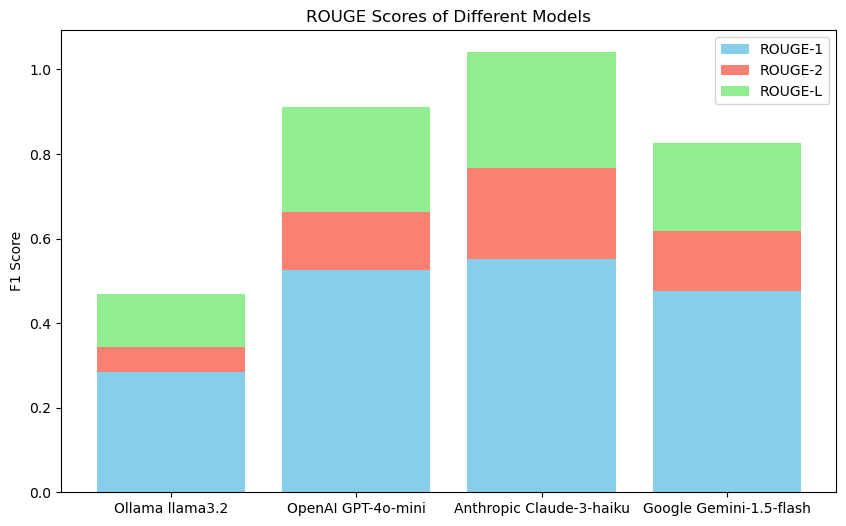

In [26]:
# Create a chart to compare the ROUGE scores of the different models

import matplotlib.pyplot as plt

models = [
    "Ollama llama3.2",
    "OpenAI GPT-4o-mini",
    "Anthropic Claude-3-haiku",
    "Google Gemini-1.5-flash",
]

rouge_1_scores = [
    ollama_scores["rouge1"],
    openai_scores["rouge1"],
    anthropic_scores["rouge1"],
    genai_scores["rouge1"],
]
rouge_2_scores = [
    ollama_scores["rouge2"],
    openai_scores["rouge2"],
    anthropic_scores["rouge2"],
    genai_scores["rouge2"],
]
rouge_l_scores = [
    ollama_scores["rougeL"],
    openai_scores["rougeL"],
    anthropic_scores["rougeL"],
    genai_scores["rougeL"],
]

plt.figure(figsize=(10, 6))

# Stack the bars using variable names for scores
plt.bar(models, rouge_1_scores, color="skyblue", label="ROUGE-1")
plt.bar(models, rouge_2_scores, bottom=rouge_1_scores, color="salmon", label="ROUGE-2")
plt.bar(
    models,
    rouge_l_scores,
    bottom=[i + j for i, j in zip(rouge_1_scores, rouge_2_scores)],
    color="lightgreen",
    label="ROUGE-L",
)

plt.ylabel("F1 Score")
plt.title("ROUGE Scores of Different Models")
plt.legend()
plt.show()

In [27]:
# Create a Gradio interface to summarize articles using the different models

def summarize_article(prompt, model):
    if model == "Ollama":
        return summarize_llama(prompt)
    elif model == "GPT":
        return summarize_gpt(prompt)
    elif model == "Claude":
        return summarize_claude(prompt)
    elif model == "Gemini":
        return gemini(prompt)

In [28]:
view = gr.Interface(
    fn=summarize_article,
    inputs=[
        gr.Textbox(label="Your article:"),
        gr.Dropdown(["Ollama","GPT", "Claude", "Gemini"], label="Select model", value="Ollama"),
    ],
    outputs=[gr.Markdown(label="Summary")],
    flagging_mode="never",
    description="Summarize an article using different models.",
)

view.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2024/11/18 08:56:34 [W] [service.go:132] login to server failed: read tcp 172.16.16.2:64269->44.237.78.176:7000: read: connection reset by peer


## Gradio example input output

In [33]:
Image(url="Gradio_Screenshot.jpg")

## To do: Fine-tuning LLM for our use case